# Import required modules:

In [54]:
import numpy as np
import os
import matplotlib.pyplot as plt

# other alternatives to load plt
#from scipy.misc import imread
#from scipy.misc import imread, imsave, imresize
#from skimage import io

import pandas as pd

# Source training and test image files:

In [3]:
train_dir = "data/train/"
test_dir = "data/test/"

len(os.listdir(test_dir))

12632

# Training set

## Obtain labels: For each different category:

In [10]:
class_names = [
"Max Speed 20 km/h",
"Max Speed 30 km/h",
"Max Speed 50 km/h",
"Max Speed 60 km/h",
"Max Speed 70 km/h",
"Max Speed 80 km/h",
"End of 80 km/h zone",
"Max Speed 100 km/h",
"Max Speed 120 km/h",
"No passing",
"No passing for vehicles over 3.5 tonnes",
"Priority",
"Priority road",
"Yield",
"Stop",
"Road closed",
"Vehicles over 3.5 tonnes prohibited",
"Do not enter",
"General danger",
"Left curve",
"Right curve",
"Double curve",
"Uneven road surface",
"Slippery when wet or dirty",
"Road narrows",
"Roadworks",
"Traffic signals ahead",
"Pedestrians",
"Watch for children",
"Bicycle crossing",
"Ice - snow",
"Wild animal crossing",
"End of all restrictions",
"Turn right ahead",
"Turn left ahead",
"Ahead only",
"Ahead or turn right only",
"Ahead or turn left only",
"Pass by on right",
"Pass by on left",
"Roundabout",
"End of no passing zone",
"End of no passing zone for trucks"
]
len(class_names)

43

## Decode all ppm pictures from a given directory into numpy array;

In [52]:
#Create a filtered list of .ppm files, then call plt.imread on the resulting list.

def PpmToNumpy(directory):
    
    '''
    Clusters decoded ppm pictures into a numpy array, given a host directory.

    Params:
    String containing a directory address.

    Returns:
    numpy array whose items are decoded ppm pictures (np.array)

    '''

    files = os.listdir(directory)
    files = [file for file in files if file.split(".")[1] == "ppm"] # to ensure only ppm images are called
    
    return np.array([plt.imread(directory + file) for file in files], dtype=object)
                       

## Label all training pictures (y_train)

In [58]:
y_train = []

for folder in os.listdir(train_dir):
    
    pictures = [pic for pic in os.listdir(train_dir + "/" + folder) if pic.split(".")[-1] == "ppm" ] # filter out non-ppm files
    #print(folder, pictures)
    
    for picture in pictures:
        y_train.append(class_names[int(folder)])

y_train = np.array(y_train)
y_train

array(['Max Speed 20 km/h', 'Max Speed 20 km/h', 'Max Speed 20 km/h', ...,
       'End of no passing zone for trucks',
       'End of no passing zone for trucks',
       'End of no passing zone for trucks'], dtype='<U39')

## Build training dataset (x_train)

In [33]:
x_train = PpmToNumpy(train_dir + "/00000/")

In [34]:
all_images = [ PpmToNumpy(train_dir + "/" + folder + "/") for folder in os.listdir(train_dir)]

x_train = np.concatenate(all_images, axis=0, out=None, dtype=None, casting="same_kind")

## Show pictures

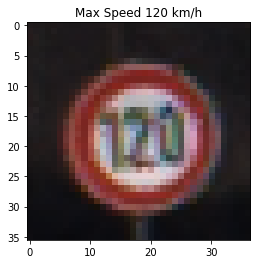

In [51]:
index = 12312

plt.figure()
plt.imshow(x_train[index, ], cmap = 'gray')
plt.title(y_train[index])
plt.show()

# Test set

In [55]:
test_meta = pd.read_csv("data/Test.csv")
test_meta.head(20)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
5,52,56,5,5,47,51,38,Test/00005.png
6,147,130,12,12,135,119,18,Test/00006.png
7,32,33,5,5,26,28,12,Test/00007.png
8,45,50,6,5,40,45,25,Test/00008.png
9,81,86,7,7,74,79,35,Test/00009.png


In [63]:
y_test = np.array(test_meta["ClassId"].apply(lambda x: class_names[x]))

y_test


array(['Vehicles over 3.5 tonnes prohibited', 'Max Speed 30 km/h',
       'Pass by on right', ..., 'End of 80 km/h zone',
       'Max Speed 100 km/h', 'No passing for vehicles over 3.5 tonnes'],
      dtype=object)

In [64]:
x_test = PpmToNumpy(test_dir)

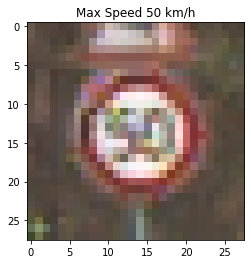

In [68]:
index = 9796

plt.figure()
plt.imshow(x_test[index, ], cmap = 'gray')
plt.title(y_test[index])
plt.show()